# Flagship vs Pancan Part 3: Trans Effect

This notebook compares the trans effects between the flagship paper and harmonized pipline.  

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 
import statsmodels.stats.multitest

import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import cptac.utils as u
import plot_utils as p
import warnings
warnings.filterwarnings('ignore')

/Users/Lindsey/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Load in trans effects df for flagship and harmonized pipelines

In [9]:
#flagship 
Gbm_df = pd.read_csv('csv_files/trans_effects_all_prot_fdr_corrected_GBM')
Hnscc_df = pd.read_csv('csv_files/trans_effects_all_prot_fdr_corrected_HNSCC')
Luad_df = pd.read_csv('csv_files/trans_effects_all_prot_fdr_corrected_LUAD')
Lscc_df = pd.read_csv('csv_files/trans_effects_all_prot_fdr_corrected_LSCC')
Brca_df = pd.read_csv('csv_files/trans_effects_all_prot_fdr_corrected_BR')
Ovarian_df = pd.read_csv('csv_files/trans_effects_all_prot_fdr_corrected_OV')
Colon_df = pd.read_csv('csv_files/trans_effects_all_prot_fdr_corrected_CO')
Kidney_df = pd.read_csv('csv_files/trans_effects_all_prot_fdr_corrected_ccRCC')


,P_value_GBM
0,0.000000e+00
1,3.507071e-21
2,6.729990e-08
3,3.420388e-06
4,3.420388e-06
...,...
10698,9.998937e-01
10699,9.998937e-01
10700,9.998937e-01
10701,9.998937e-01


In [4]:
#Harmonized/pancan
Gbm_df_pc = pd.read_csv('csv_files/trans_effects_all_prot_fdr_corrected_GBM_Harmonized')
Hnscc_df_pc = pd.read_csv('csv_files/trans_effects_all_prot_fdr_corrected_HNSCC_Harmonized')
Luad_df_pc = pd.read_csv('csv_files/trans_effects_all_prot_fdr_corrected_LUAD_Harmonized')
Lscc_df_pc = pd.read_csv('csv_files/trans_effects_all_prot_fdr_corrected_LSCC_Harmonized')
Brca_df_pc = pd.read_csv('csv_files/trans_effects_all_prot_fdr_corrected_BR_Harmonized')
Ovarian_df_pc = pd.read_csv('csv_files/trans_effects_all_prot_fdr_corrected_OV_Harmonized')
Colon_df_pc = pd.read_csv('csv_files/trans_effects_all_prot_fdr_corrected_CO_Harmonized')
Kidney_df_pc = pd.read_csv('csv_files/trans_effects_all_prot_fdr_corrected_ccRCC_Harmonized')

Compare significant trans gens 

Create venn diagram of significant trans genes from the flagship and pancan pipelines

In [12]:
def compare_og_pancan_trans_genes(og_df, pancan_df,title):
    #in running the trans effects duplicate gene names due different database ids were labeled with _1 ect.
    #we will remove them when comparing significant gene names for trans effects 
    og_df["Comparison"] = og_df['Comparison'].str.replace(r"_\d","")
    og_df.columns = og_df.columns.str.replace(r"(?<=P_value)_\w.*","")

    og_genes = og_df.loc[(og_df["P_value"] <= 0.05)].Comparison.to_list()
    
    pancan_df["Comparison"] = pancan_df['Comparison'].str.replace(r"_\d","")
    pancan_df.columns = pancan_df.columns.str.replace(r"(?<=P_value)_\w.*","")
    pancan_genes = pancan_df.loc[(pancan_df["P_value"] <= 0.05)].Comparison.to_list()
    #remove duplicates due to deleting _1 labels
    og_genes = set(og_genes)
    pancan_genes = set(pancan_genes)
    venn2([og_genes,pancan_genes],("Flagship_genes", "Pancan_genes"))
    plt.title(title)
    
    

In [13]:
#GBM
compare_og_pancan_trans_genes(Gbm_df, Gbm_df_pc,"GBM")
#gbm_df = gbm_df.rename({"Correlation": "Correlation_GBM", "P_value": "P_value_GBM"}, axis='columns')
#pancan_gbm_df = pancan_gbm_df.rename({"Correlation": "Correlation_GBM", "P_value": "P_value_GBM"}, axis='columns')


KeyError: 'P_value'

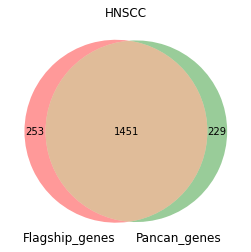

In [78]:
#HNSCC
compare_og_pancan_trans_genes(hnscc_df, pancan_hnscc,"HNSCC")
hnscc_df = hnscc_df.rename({"Correlation": "Correlation_HNSCC", "P_value": "P_value_HNSCC"}, axis='columns')
pancan_hnscc_df = pancan_hnscc.rename({"Correlation": "Correlation_HNSCC", "P_value": "P_value_HNSCC"}, axis='columns')


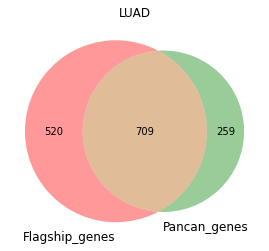

In [79]:
#LUAD
compare_og_pancan_trans_genes(luad_df, pancan_luad,"LUAD")
luad_df = luad_df.rename({"Correlation": "Correlation_LUAD", "P_value": "P_value_LUAD"}, axis='columns')
pancan_luad_df = pancan_luad.rename({"Correlation": "Correlation_LUAD", "P_value": "P_value_LUAD"}, axis='columns')


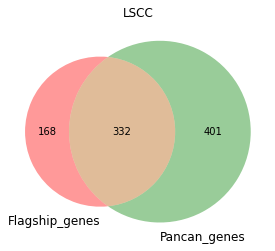

In [80]:
#LSCC
compare_og_pancan_trans_genes(lscc_df, pancan_lscc,"LSCC")
lscc_df = lscc_df.rename({"Correlation": "Correlation_LSCC", "P_value": "P_value_LSCC"}, axis='columns')
pancan_lscc_df = pancan_lscc.rename({"Correlation": "Correlation_LSCC", "P_value": "P_value_LSCC"}, axis='columns')


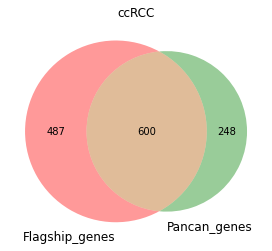

In [81]:
#ccRCC
compare_og_pancan_trans_genes(ccrcc_df, pancan_ccrcc,"ccRCC")
ccrcc_df = ccrcc_df.rename({"Correlation": "Correlation_ccRCC", "P_value": "P_value_ccRCC"}, axis='columns')
pancan_ccrcc_df = pancan_ccrcc.rename({"Correlation": "Correlation_ccRCC", "P_value": "P_value_ccRCC"}, axis='columns')


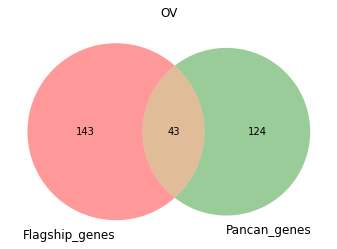

In [82]:
#OV
compare_og_pancan_trans_genes(ov_df, pancan_ov,"OV")
ov_df = ov_df.rename({"Correlation": "Correlation_OV", "P_value": "P_value_OV"}, axis='columns')
pancan_ov_df = pancan_ov.rename({"Correlation": "Correlation_OV", "P_value": "P_value_OV"}, axis='columns')


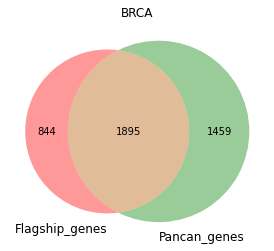

In [83]:
#Brca
compare_og_pancan_trans_genes(brca_df, pancan_brca,"BRCA")
brca_df = brca_df.rename({"Correlation": "Correlation_BRCA", "P_value": "P_value_BRCA"}, axis='columns')
pancan_brca_df = pancan_brca.rename({"Correlation": "Correlation_BRCA", "P_value": "P_value_BRCA"}, axis='columns')


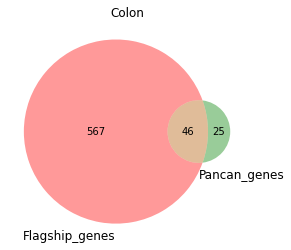

In [84]:
#Colon
compare_og_pancan_trans_genes(colon_df, pancan_colon,"Colon")
colon_df = colon_df.rename({"Correlation": "Correlation_CO", "P_value": "P_value_CO"}, axis='columns')
pancan_colon_df = pancan_colon.rename({"Correlation": "Correlation_CO", "P_value": "P_value_CO"}, axis='columns')


# Step 3:  Determine consistency of trans effects across cancer types

First combine all of the trans effects into one data frame

# Flagship

In [104]:
ccrcc_df

,Comparison,Correlation_ccRCC,P_value_ccRCC
2544,EGFR,1.000000,0.000000e+00
6513,PPM1B,-0.584494,1.005437e-07
741,ATP11A,0.577079,1.368835e-07
6296,PLCB1,0.561952,3.668177e-07
504,APAF1,0.560909,3.668177e-07
...,...,...,...
6592,PRDM10,-0.000443,9.983727e-01
2277,DHX29,0.000211,9.985571e-01
4317,KLHL11,-0.000199,9.986944e-01
4502,LMNA,-0.000131,9.990173e-01


In [107]:
#combine all of flagship trans df 
pancan = pd.merge(gbm_df, ccrcc_df, on="Comparison", how = "outer")
pancan = pd.merge(pancan, ov_df, on="Comparison", how = "outer")
pancan = pd.merge(pancan, luad_df, on="Comparison", how = "outer")
pancan = pd.merge(pancan, lscc_df, on="Comparison", how = "outer")
pancan = pd.merge(pancan, brca_df, on="Comparison", how = "outer")
pancan = pd.merge(pancan, colon_df, on="Comparison", how = "outer")
pancan = pd.merge(pancan, hnscc_df, on="Comparison", how = "outer")
pancan = pancan[1:]
pancan.to_csv('csv_files/Supplemental_Table_2.csv', index=False)
pancan

,Comparison,Correlation_GBM,P_value_GBM,Correlation_ccRCC,P_value_ccRCC,Correlation_OV,P_value_OV,Correlation_LUAD,P_value_LUAD,Correlation_LSCC,P_value_LSCC,Correlation_BRCA,P_value_BRCA,Correlation_CO,P_value_CO,Correlation_HNSCC,P_value_HNSCC
1,PHLDA1,0.816848,3.507071e-21,0.254436,0.060261,NaN,NaN,0.260110,0.074530,0.713420,2.644826e-14,0.364797,0.002164,0.386104,0.122847,0.587915,1.282608e-08
2,GRB2,-0.610889,6.729990e-08,-0.217427,0.120342,-0.190090,0.346111,-0.302439,0.020631,-0.198042,2.437176e-01,-0.177379,0.142733,0.150960,0.347409,-0.496325,1.084446e-05
3,SOCS2,0.562720,3.420388e-06,NaN,NaN,NaN,NaN,NaN,NaN,0.472624,1.417921e-02,NaN,NaN,NaN,NaN,-0.014519,9.611234e-01
4,CDH4,0.559180,3.420388e-06,0.148407,0.513490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,DAB2,-0.556402,3.420388e-06,-0.076173,0.673774,0.076981,0.750510,-0.086403,0.597546,-0.072496,7.501117e-01,0.326055,0.003543,-0.147519,0.360266,-0.224967,7.751436e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26596,PIM1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002105,9.917500e-01
26597,HEPHL1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001563,9.931644e-01
26598,SULT6B1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001236,9.950909e-01
26599,CLEC4G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001142,9.963768e-01


In [108]:
pancan = pd.merge(gbm_df, ccrcc_df, on="Comparison", how = "outer")
pancan

,Comparison,Correlation_GBM,P_value_GBM,Correlation_ccRCC,P_value_ccRCC
0,EGFR,1.000000,0.000000e+00,1.000000,0.000000
1,PHLDA1,0.816848,3.507071e-21,0.254436,0.060261
2,GRB2,-0.610889,6.729990e-08,-0.217427,0.120342
3,SOCS2,0.562720,3.420388e-06,NaN,NaN
4,CDH4,0.559180,3.420388e-06,0.148407,0.513490
...,...,...,...,...,...
11890,SEMA3G,NaN,NaN,0.000838,0.997996
11891,GSTA1,NaN,NaN,0.000486,0.997996
11892,LY6D,NaN,NaN,-0.000398,0.998373
11893,FILIP1,NaN,NaN,-0.000286,0.998373


In [110]:
ccrcc_df

,Comparison,Correlation_ccRCC,P_value_ccRCC
2544,EGFR,1.000000,0.000000e+00
6513,PPM1B,-0.584494,1.005437e-07
741,ATP11A,0.577079,1.368835e-07
6296,PLCB1,0.561952,3.668177e-07
504,APAF1,0.560909,3.668177e-07
...,...,...,...
6592,PRDM10,-0.000443,9.983727e-01
2277,DHX29,0.000211,9.985571e-01
4317,KLHL11,-0.000199,9.986944e-01
4502,LMNA,-0.000131,9.990173e-01


In [59]:
#Calculate mean and standard deviation for pvalues and Pearson Correlations
og_combined["Standard_Deviation_P_value"] = og_combined.loc[:,["P_value_GBM","P_value_ccRCC","P_value_OV","P_value_BRCA","P_value_LUAD","P_value_HNSCC","P_value_LSCC","P_value_CO"]].std(axis = 1)
og_combined["Mean_P_value"] = og_combined.loc[:,["P_value_GBM","P_value_ccRCC","P_value_OV","P_value_BRCA","P_value_LUAD","P_value_HNSCC","P_value_LSCC","P_value_CO"]].mean(axis = 1)
og_combined["Standard_Deviation_Correlation"] = (og_combined.loc[:,["Correlation_GBM","Correlation_ccRCC","Correlation_OV","Correlation_BRCA","Correlation_LUAD","Correlation_HNSCC","Correlation_LSCC","Correlation_CO"]].std(axis = 1))
og_combined["Mean_Correlation"] = (og_combined.loc[:,["Correlation_GBM","Correlation_ccRCC","Correlation_OV","Correlation_BRCA","Correlation_LUAD","Correlation_HNSCC","Correlation_LSCC","Correlation_CO"]].mean(axis = 1))
og_combined

,Comparison,Correlation_GBM,P_value_GBM,Correlation_ccRCC,P_value_ccRCC,Correlation_CO,P_value_CO,Correlation_OV,P_value_OV,Correlation_LUAD,...,Correlation_LSCC,P_value_LSCC,Correlation_BRCA,P_value_BRCA,Correlation_HNSCC,P_value_HNSCC,Standard_Deviation_P_value,Mean_P_value,Standard_Deviation_Correlation,Mean_Correlation
1,PHLDA1,0.816848,3.507071e-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.713420,2.644826e-14,0.364797,0.002164,0.587915,1.282608e-08,0.001082,0.000541,0.194621,0.620745
2,GRB2,-0.610889,6.729990e-08,NaN,NaN,NaN,NaN,NaN,NaN,-0.302439,...,NaN,NaN,NaN,NaN,-0.496325,1.084446e-05,0.011908,0.006881,0.155916,-0.469884
3,SOCS2,0.562720,3.420388e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.472624,1.417921e-02,NaN,NaN,NaN,NaN,0.010024,0.007091,0.063707,0.517672
4,CDH4,0.559180,3.420388e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000003,NaN,0.559180
5,DAB2,-0.556402,3.420388e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.326055,0.003543,NaN,NaN,0.002503,0.001773,0.623991,-0.115173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6446,TMUB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.245838,4.970798e-02,NaN,0.049708,NaN,0.245838
6447,PARL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.245796,4.972477e-02,NaN,0.049725,NaN,0.245796
6448,RGS14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.245782,4.972477e-02,NaN,0.049725,NaN,-0.245782
6449,STEAP1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.252364,4.972477e-02,NaN,0.049725,NaN,0.252364


In [55]:
def Pvalue_sig(row):
    numSig = 0

    for item in row:
        if pd.isnull(item):
            continue
        if item < 0.05:
            numSig += 1
            
    return numSig

In [56]:
og_combined["Num_sig"] = og_combined.loc[:,["P_value_GBM","P_value_ccRCC","P_value_OV","P_value_BRCA","P_value_LUAD","P_value_HNSCC","P_value_LSCC","P_value_CO"]].apply(Pvalue_sig, axis = 1)
og_combined= og_combined.sort_values(by=['Num_sig'],ascending=False)
#Filter for proteins that are significant in at least 1 cancer. 
og_combined_1 = og_combined[og_combined['Num_sig'].isin([1,2,3,4,5,6,7,8])]
og_combined_1

,Comparison,Correlation_GBM,P_value_GBM,Correlation_ccRCC,P_value_ccRCC,Correlation_CO,P_value_CO,Correlation_OV,P_value_OV,Correlation_LUAD,...,P_value_LSCC,Correlation_BRCA,P_value_BRCA,Correlation_HNSCC,P_value_HNSCC,Standard_Deviation_P_value,Mean_P_value,Standard_Deviation_Correlation,Mean_Correlation,Num_sig
128,MYO10,0.447478,0.000289,-0.263921,0.049045,NaN,NaN,0.374118,0.035041,NaN,...,4.901629e-02,0.515801,5.191477e-07,0.434632,1.438282e-04,0.024755,0.022256,0.286357,0.300096,6
504,CNNM4,-0.372324,0.003168,NaN,NaN,0.352937,0.013936,NaN,NaN,0.270616,...,3.142153e-02,-0.260055,2.329196e-02,0.334353,4.724641e-03,0.015069,0.019593,0.330244,0.106197,6
580,CD109,-0.361839,0.004379,0.268902,0.044632,0.297635,0.042193,NaN,NaN,NaN,...,7.836561e-03,0.265349,2.042875e-02,0.454761,6.489557e-05,0.019436,0.019922,0.291085,0.214212,6
61,LANCL2,0.478723,0.000091,NaN,NaN,0.320786,0.026823,NaN,NaN,0.588808,...,2.040789e-07,0.300981,7.599309e-03,0.802151,2.402226e-23,0.010758,0.005752,0.187806,0.511211,6
2121,KIF13B,NaN,NaN,-0.310972,0.016103,NaN,NaN,0.439778,0.009101,-0.272975,...,6.920009e-03,-0.312353,5.460232e-03,-0.461065,5.405157e-05,0.014099,0.012873,0.326626,-0.213543,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,ANKRD1,NaN,NaN,NaN,NaN,NaN,NaN,-0.422420,0.045146,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.045146,NaN,-0.422420,1
3137,TCF20,NaN,NaN,NaN,NaN,NaN,NaN,0.357619,0.046441,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.046441,NaN,0.357619,1
3138,NAP1L1,NaN,NaN,NaN,NaN,NaN,NaN,-0.357673,0.046441,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.046441,NaN,-0.357673,1
3139,CASP9,NaN,NaN,NaN,NaN,NaN,NaN,-0.371895,0.048109,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.048109,NaN,-0.371895,1


The manuscript mentions that 4,149/ 6,230 proteins are significant in only one cancer. This code block derives those numbers 

In [47]:
#print the number of genes significant in 1, 2, 3 ect cancers
counts =og_combined_1['Num_sig'].value_counts()
counts

1    10510
2     4569
3     1302
4      281
5       25
6        5
Name: Num_sig, dtype: int64

This code block show the genes that are significant in 6 cancers. LANCL2 is the only one that doesn't have opposite trans effects in different cancers

In [33]:
#combine all pancan trans dfs
pancan = pd.merge(pancan_gbm_df, pancan_hnscc_df, on="Comparison", how = "outer")
pancan = pd.merge(pancan, pancan_luad_df, on="Comparison", how = "outer")
pancan = pd.merge(pancan, pancan_lscc_df, on="Comparison", how = "outer")
pancan = pd.merge(pancan, pancan_ccrcc_df, on="Comparison", how = "outer")
pancan = pd.merge(pancan, pancan_brca_df, on="Comparison", how = "outer")
pancan = pd.merge(pancan, pancan_ov_df, on="Comparison", how = "outer")
pancan = pd.merge(pancan, pancan_colon_df, on="Comparison", how = "outer")
pancan = pancan[1:]
pancan.to_csv("csv_files/harmonized_trans_effects_all_fdr.csv")
pancan


,Comparison,Correlation_GBM,P_value_GBM,Correlation_HNSCC,P_value_HNSCC,Correlation_LUAD,P_value_LUAD,Correlation_LSCC,P_value_LSCC,Correlation_ccRCC,P_value_ccRCC,Correlation_BRCA,P_value_BRCA,Correlation_OV,P_value_OV,Correlation_CO,P_value_CO
1,PHLDA1,0.789551,9.649849e-19,0.583064,1.395609e-08,0.261161,0.058276,0.682116,1.398013e-12,0.180866,0.249285,0.212226,0.066258,0.383373,0.128340,0.437505,0.143566
2,CDH4,0.656331,4.744022e-10,NaN,NaN,NaN,NaN,NaN,NaN,0.015524,0.965357,NaN,NaN,NaN,NaN,NaN,NaN
3,GRB2,-0.589008,3.310325e-07,-0.481605,2.053150e-05,-0.265172,0.054181,-0.098621,5.999783e-01,-0.245694,0.081461,-0.168101,0.160235,-0.097221,0.639167,-0.017903,0.972007
4,PHLDA3,0.561528,2.006861e-06,0.693125,2.351012e-14,0.216646,0.131629,0.651618,5.103796e-11,0.364164,0.005159,0.152625,0.207694,-0.260799,0.159831,0.161425,0.624900
5,GLA,-0.562315,2.006861e-06,0.019987,9.161161e-01,0.213431,0.138822,0.006542,9.809384e-01,-0.273040,0.047412,-0.000452,0.997917,-0.021412,0.935707,-0.029155,0.947540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5194947,CHP2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027394,0.964642
5194948,RYR3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025538,0.972007
5194949,NXPE4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010592,0.987860
5194950,LEFTY1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010471,0.988552


In [39]:
#Calculate mean and standard deviation for pvalues and Pearson Correlations
pancan["Standard_Deviation_P_value"] = pancan.loc[:,["P_value_GBM","P_value_ccRCC","P_value_OV","P_value_BRCA","P_value_LUAD","P_value_HNSCC","P_value_LSCC","P_value_CO"]].std(axis = 1)
pancan["Mean_P_value"] = pancan.loc[:,["P_value_GBM","P_value_ccRCC","P_value_OV","P_value_BRCA","P_value_LUAD","P_value_HNSCC","P_value_LSCC","P_value_CO"]].mean(axis = 1)
pancan["Standard_Deviation_Correlation"] = (pancan.loc[:,["Correlation_GBM","Correlation_ccRCC","Correlation_OV","Correlation_BRCA","Correlation_LUAD","Correlation_HNSCC","Correlation_LSCC","Correlation_CO"]].std(axis = 1))
pancan["Mean_Correlation"] = (pancan.loc[:,["Correlation_GBM","Correlation_ccRCC","Correlation_OV","Correlation_BRCA","Correlation_LUAD","Correlation_HNSCC","Correlation_LSCC","Correlation_CO"]].mean(axis = 1))
pancan

,Comparison,Correlation_GBM,P_value_GBM,Correlation_HNSCC,P_value_HNSCC,Correlation_LUAD,P_value_LUAD,Correlation_LSCC,P_value_LSCC,Correlation_ccRCC,...,Correlation_BRCA,P_value_BRCA,Correlation_OV,P_value_OV,Correlation_CO,P_value_CO,Standard_Deviation_P_value,Mean_P_value,Standard_Deviation_Correlation,Mean_Correlation
1,PHLDA1,0.789551,9.649849e-19,0.583064,1.395609e-08,0.261161,0.058276,0.682116,1.398013e-12,0.180866,...,0.212226,0.066258,0.383373,0.128340,0.437505,0.143566,0.088553,0.080716,0.225353,0.441233
2,CDH4,0.656331,4.744022e-10,NaN,NaN,NaN,NaN,NaN,NaN,0.015524,...,NaN,NaN,NaN,NaN,NaN,NaN,0.682610,0.482678,0.453119,0.335928
3,GRB2,-0.589008,3.310325e-07,-0.481605,2.053150e-05,-0.265172,0.054181,-0.098621,5.999783e-01,-0.245694,...,-0.168101,0.160235,-0.097221,0.639167,-0.017903,0.972007,0.370885,0.313381,0.198380,-0.245415
4,PHLDA3,0.561528,2.006861e-06,0.693125,2.351012e-14,0.216646,0.131629,0.651618,5.103796e-11,0.364164,...,0.152625,0.207694,-0.260799,0.159831,0.161425,0.624900,0.212853,0.141152,0.318613,0.317541
5,GLA,-0.562315,2.006861e-06,0.019987,9.161161e-01,0.213431,0.138822,0.006542,9.809384e-01,-0.273040,...,-0.000452,0.997917,-0.021412,0.935707,-0.029155,0.947540,0.464684,0.620557,0.234771,-0.080802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5194947,CHP2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.027394,0.964642,NaN,0.964642,NaN,0.027394
5194948,RYR3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.025538,0.972007,NaN,0.972007,NaN,0.025538
5194949,NXPE4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.010592,0.987860,NaN,0.987860,NaN,-0.010592
5194950,LEFTY1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.010471,0.988552,NaN,0.988552,NaN,-0.010471


Second, calculate the number of significant cancers for each protein

In [40]:
def Pvalue_sig(row):
    numSig = 0

    for item in row:
        if pd.isnull(item):
            continue
        if item < 0.05:
            numSig += 1
            
    return numSig

In [42]:
og_combined["Num_sig"] = og_combined.loc[:,["P_value_GBM","P_value_ccRCC","P_value_OV","P_value_BRCA","P_value_LUAD","P_value_HNSCC","P_value_LSCC","P_value_CO"]].apply(Pvalue_sig, axis = 1)
og_combined= og_combined.sort_values(by=['Num_sig'],ascending=False)
#Filter for proteins that are significant in at least 1 cancer. 
og_combined_1 = og_combined[og_combined['Num_sig'].isin([1,2,3,4,5,6,7,8])]
og_combined_1

,Comparison,Correlation_GBM,P_value_GBM,Correlation_ccRCC,P_value_ccRCC,Correlation_OV,P_value_OV,Correlation_LUAD,P_value_LUAD,Correlation_LSCC,...,P_value_BRCA,Correlation_HNSCC,P_value_HNSCC,Correlation_CO,P_value_CO,Standard_Deviation_P_value,Mean_P_value,Standard_Deviation_Correlation,Mean_Correlation,Num_sig
11866,KIF13B,-0.143903,0.357780,-0.310972,0.016103,0.439778,0.009101,-0.272975,3.960258e-02,-0.363670,...,5.460232e-03,-0.461065,5.405157e-05,0.019902,0.918920,0.326292,0.169243,0.288168,-0.175657,6
980,CNNM4,-0.372324,0.003168,0.069926,0.718877,0.076606,0.751602,0.270616,4.101591e-02,0.311652,...,2.329196e-02,0.334353,4.724641e-03,0.352937,0.013936,0.331640,0.198505,0.279528,0.097964,6
81,LANCL2,0.478723,0.000091,0.188217,0.193598,0.110983,0.627956,0.588808,4.733914e-08,0.575817,...,7.599309e-03,0.802151,2.402226e-23,0.320786,0.026823,0.220706,0.107008,0.231603,0.420808,6
205,MYO10,0.447478,0.000289,-0.263921,0.049045,0.374118,0.035041,0.230896,8.949836e-02,0.292466,...,5.191477e-07,0.434632,1.438282e-04,NaN,NaN,0.034009,0.031862,0.262712,0.290210,6
1139,CD109,-0.361839,0.004379,0.268902,0.044632,0.015377,0.961793,0.113339,4.717738e-01,0.360461,...,2.042875e-02,0.454761,6.489557e-05,0.297635,0.042193,0.348542,0.194138,0.256942,0.176748,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5159,POSTN,-0.257008,0.062307,-0.084296,0.643112,-0.123615,0.575748,-0.073134,6.662509e-01,-0.049167,...,8.816556e-01,0.331834,5.049503e-03,0.023603,0.907290,0.353938,0.573050,0.169842,-0.026140,1
9546,CAMSAP3,0.180777,0.225223,0.308296,0.234135,0.284773,0.123849,0.412384,7.370374e-04,0.042682,...,5.475864e-02,-0.120254,4.085479e-01,-0.154366,0.333697,0.273397,0.281105,0.240004,0.091146,1
5172,POSTN,-0.257008,0.062307,-0.084296,0.643112,-0.123615,0.575748,-0.073134,6.662509e-01,-0.017179,...,4.901488e-01,0.331834,5.049503e-03,0.023603,0.907290,0.348778,0.538072,0.173948,-0.013451,1
5150,POSTN,-0.257008,0.062307,-0.084296,0.643112,-0.123615,0.575748,-0.091699,5.723078e-01,-0.017179,...,9.174386e-01,0.331834,5.049503e-03,0.023603,0.907290,0.371098,0.579741,0.170277,-0.025281,1


In [31]:
#Append all trans effects
# Create long df for heatmap
cancer = ['GBM','HNSCC','LSCC','LUAD','BR','OV','ccRCC','CO']
merged_dfs = [gbm_df,hnscc_df,lscc_df,luad_df,brca_df,ov_df,ccrcc_df,colon_df]

all_long_df = pd.DataFrame()
i = 0
for c in cancer:
    m = merged_dfs[i]
    m2 = m.assign(Cancer = c)
    m2 = m2.rename(columns={'P_value_' + c: 'P_Value'})
    m2 = m2.rename(columns={'Correlation_' + c: 'Correlation'})
    all_long_df = all_long_df.append(m2) 
    if i < 7:
        i += 1


In [ ]:
# Create long df for heatmap

cancer = ['GBM','HNSCC','LSCC','LUAD','BR','OV','ccRCC','CO']
merged_dfs = [pancan_gbm_df,pancan_hnscc_df,pancan_luad_df,pancan_lscc_df,pancan_ccrcc_df,pancan_brca_df,pancan_ov_df,pancan_colon_df]

all_long_df = pd.DataFrame()
i = 0
for c in cancer:
    m = merged_dfs[i]
    m2 = m.assign(Cancer = c)
    m2 = m2.rename(columns={'P_value_' + c: 'P_Value'})
    m2 = m2.rename(columns={'Correlation_' + c: 'Correlation'})
    all_long_df = all_long_df.append(m2) 
    if i < 7:
        i += 1
        

In [ ]:
# get only significant trans effects
Gbm_df_sig = gbm_df.loc[(gbm_df["P_value_GBM"] <= 0.05)]
Kidney_df_sig = ccrcc_df.loc[(ccrcc_df["P_value_ccRCC"] <= 0.05)]
Colon_df_sig =colon_df.loc[(colon_df["P_value_CO"] <= 0.05)]
Ovarian_df_sig = ov_df.loc[(ov_df["P_value_OV"] <= 0.05)]
Luad_df_sig = luad_df.loc[(luad_df["P_value_LUAD"] <= 0.05)]
Lscc_df_sig = lscc_df.loc[(lscc_df["P_value_LSCC"] <= 0.05)]
Brca_df_sig = brca_df.loc[(brca_df["P_value_BRCA"] <= 0.05)]
Hnscc_df_sig = hnscc_df.loc[(hnscc_df["P_value_HNSCC"] <= 0.05)]